# Feature Engineering: Comment Détecter les Valeurs Aberrantes (Outliers)?

## importer les packages

In [21]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## importer la base de données

In [4]:
df = pd.read_csv('data/NBA_season1718_salary.csv')

## Decouverte de la base de données

In [15]:
#les 10 premieres lignes
df.head(10)

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0
5,6,Kyle Lowry,TOR,28703704.0
6,7,Russell Westbrook,OKC,28530608.0
7,8,Mike Conley,MEM,28530608.0
8,9,James Harden,HOU,28299399.0
9,10,DeMar DeRozan,TOR,27739975.0


In [16]:
#les 10 dernieres lignes
df.tail(10)

,Unnamed: 0,Player,Tm,season17_18
563,564,Trey McKinney-Jones,IND,46080.0
564,565,Jameel Warney,DAL,46080.0
565,566,Marcus Thornton,CLE,46080.0
566,567,DeAndre Liggins,ATL,26773.0
567,568,Axel Toupane,NOP,25000.0
568,569,Quinn Cook,NOP,25000.0
569,570,Chris Johnson,HOU,25000.0
570,571,Beno Udrih,DET,25000.0
571,572,Joel Bolomboy,MIL,22248.0
572,573,Jarell Eddie,CHI,17224.0


##  verification des valeurs manquantes

In [18]:
#affiche la somme des valeurs manquantes par variable option1
df.isna().sum()

Unnamed: 0     0
Player         0
Tm             0
season17_18    0
dtype: int64

In [19]:
#affiche la somme des valeurs manquantes par variable option2
df.isnull().sum()

Unnamed: 0     0
Player         0
Tm             0
season17_18    0
dtype: int64

Note : on peut remarquer que notre base de données ne contient pas de valeur manquante

In [13]:
# Vérifier la taille de notre base de données
df.shape

(573, 4)

##  Verifications des outliers

Nous avons deux techniques pour verifier les valeurs aberrantes : analytiques et visuelles

### Techniques visuelles

Nous allons utiliser la solution des Boxplot ou diagramme de moustache

#### Boxplot

<AxesSubplot:xlabel='season17_18'>

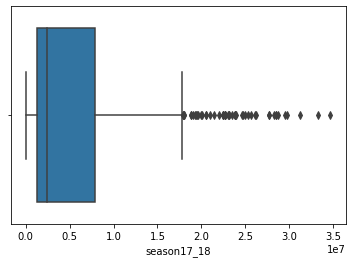

In [22]:
sns.boxplot(x=df['season17_18'])

on constate des valeurs aberrantes en dehors de notre Boxplot ( on l'estime en general autours de 5%), il s'agit des valeurs au dessus de 1.7

#### Comment detecter les valeurs aberrantes ?

On va considerer une limite de 95% des données et au dela ce sera des valeurs aberrantes

In [23]:
upper_lim = df['season17_18'].quantile(.95)

In [25]:
df_outliers = df[df['season17_18'] > upper_lim]
df_outliers

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0
5,6,Kyle Lowry,TOR,28703704.0
6,7,Russell Westbrook,OKC,28530608.0
7,8,Mike Conley,MEM,28530608.0
8,9,James Harden,HOU,28299399.0
9,10,DeMar DeRozan,TOR,27739975.0


### Techniques analytiques

Nous allons utiliser la methode z_score qui mesure la distance par rapport à la mmoyenne

In [29]:
outliers =[] #creer une liste qui contient les valeurs aberrantes

def detect_outliers(data):
    threshold=3 #valeur limite
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [30]:
# Detecter les salaires considerés comme aberrants
detect_outliers(df['season17_18'])

[34682550.0,
 33285709.0,
 31269231.0,
 29727900.0,
 29512900.0,
 28703704.0,
 28530608.0,
 28530608.0,
 28299399.0,
 27739975.0,
 27734405.0]